# Duratec (DUR.AX) H2 2024 guidance analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from tqdm.notebook import tqdm, trange

import plotly.io as pio
pio.renderers.default = "svg"


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/Duratec-Segments-Report/main/data/duratec_segments.csv')
df['Energy'] = df['Energy'].replace('-', 0)
df['Year/Segment'] = df['Year/Segment'].ffill()
df = df.replace(',', '.', regex=True)
df.index = pd.MultiIndex.from_frame(df[['Year/Segment', 'Item']])
df = df.drop(columns=['Year/Segment', 'Item'])
df = df.astype(float)
df

Defence  Mining & Industrial  \
Year/Segment Item                                               
2019.0       Revenue (000)        71.904               22.242   
             Gross profit (000)   13.846                5.453   
             Gross margin (%)     19.260               24.520   
2020.0       Revenue (000)        54.106               27.588   
             Gross profit (000)    8.905                4.563   
             Gross margin (%)     16.460               16.540   
2021.0       Revenue (000)        54.976               32.289   
             Gross profit (000)    7.118                8.408   
             Gross margin (%)     12.950               26.040   
2022.0       Revenue (000)       112.069               55.183   
             Gross profit (000)   15.940               11.853   
             Gross margin (%)     14.220               21.480   
2023.0       Revenue (000)       124.151               84.044   
             Gross profit (000)   13.377               18.389   
             Gross margin (%)     10.770               21.880   

                                 Buildings & Façades  Energy  Other Segments  \
Year/Segment Item                                                              
2019.0       Revenue (000)                    11.259   0.000          22.802   
             Gross profit (000)                2.059   0.000           3.618   
             Gross margin (%)                 18.290   0.000          15.870   
2020.0       Revenue (000)                    15.301   0.000          27.068   
             Gross profit (000)                4.190   0.000           5.560   
             Gross margin (%)                 27.380   0.000          20.540   
2021.0       Revenue (000)                    26.957   0.000          16.661   
             Gross profit (000)                3.369   0.000           1.838   
             Gross margin (%)                 12.500   0.000          11.030   
2022.0       Revenue (000)                    38.093   0.000          23.187   
             Gross profit (000)                6.205   0.000           1.670   
             Gross margin (%)                 16.290   0.000           7.200   
2023.0       Revenue (000)                    52.871  23.250           8.421   
             Gross profit (000)                6.581   8.126           0.909   
             Gross margin (%)                 12.450  34.950          10.790   

                                   Total  
Year/Segment Item                         
2019.0       Revenue (000)       128.207  
             Gross profit (000)   24.976  
             Gross margin (%)     19.480  
2020.0       Revenue (000)       124.063  
             Gross profit (000)   23.218  
             Gross margin (%)     18.710  
2021.0       Revenue (000)       130.883  
             Gross profit (000)   20.733  
             Gross margin (%)     15.840  
2022.0       Revenue (000)       228.532  
             Gross profit (000)   35.668  
             Gross margin (%)     15.610  
2023.0       Revenue (000)       292.737  
             Gross profit (000)   47.382  
             Gross margin (%)     16.190

# Revenue and Gross profit per segment

In [3]:
df_revenue = df.loc[(slice(None), 'Revenue (000)'), :].drop('Total', axis=1).stack().reset_index(name='Amount').rename(columns={'level_2': 'Segment'})

In [4]:
df_gross_profit = df.loc[(slice(None), 'Gross profit (000)'), :].drop('Total', axis=1).stack().reset_index(name='Amount').rename(columns={'level_2': 'Segment'})

d:\Development\Python\Duratec-Segments-Report\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



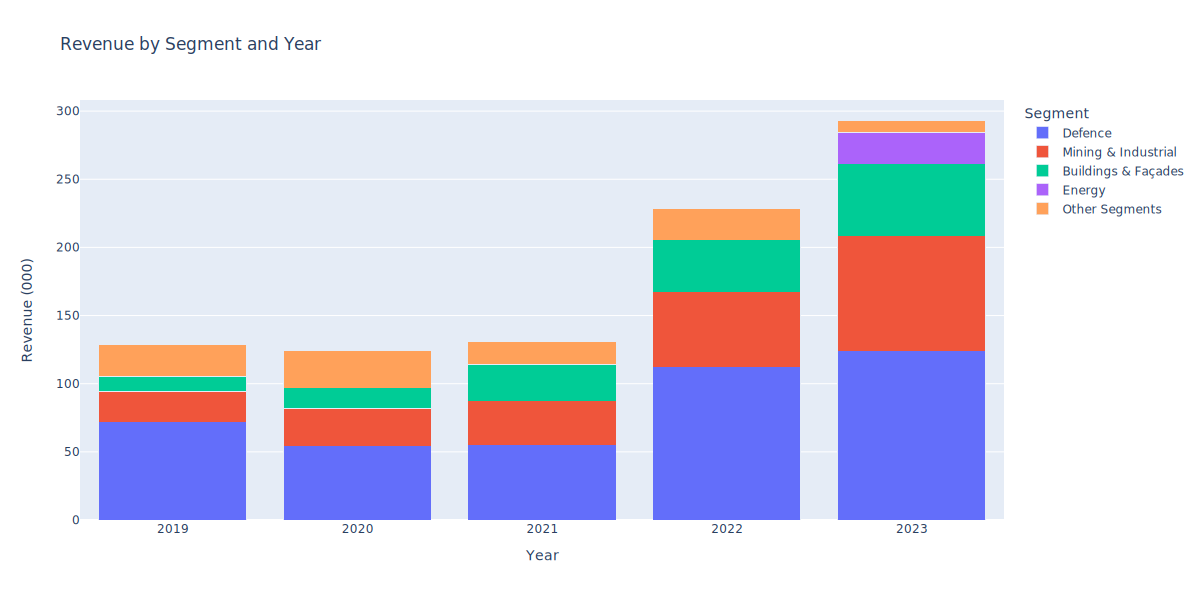

In [5]:
px.bar(df_revenue, x='Year/Segment', y='Amount', color='Segment', barmode='stack', title='Revenue by Segment and Year', labels={'Amount': 'Revenue (000)', 'Year/Segment': 'Year'}, height=600, width=1200)

d:\Development\Python\Duratec-Segments-Report\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



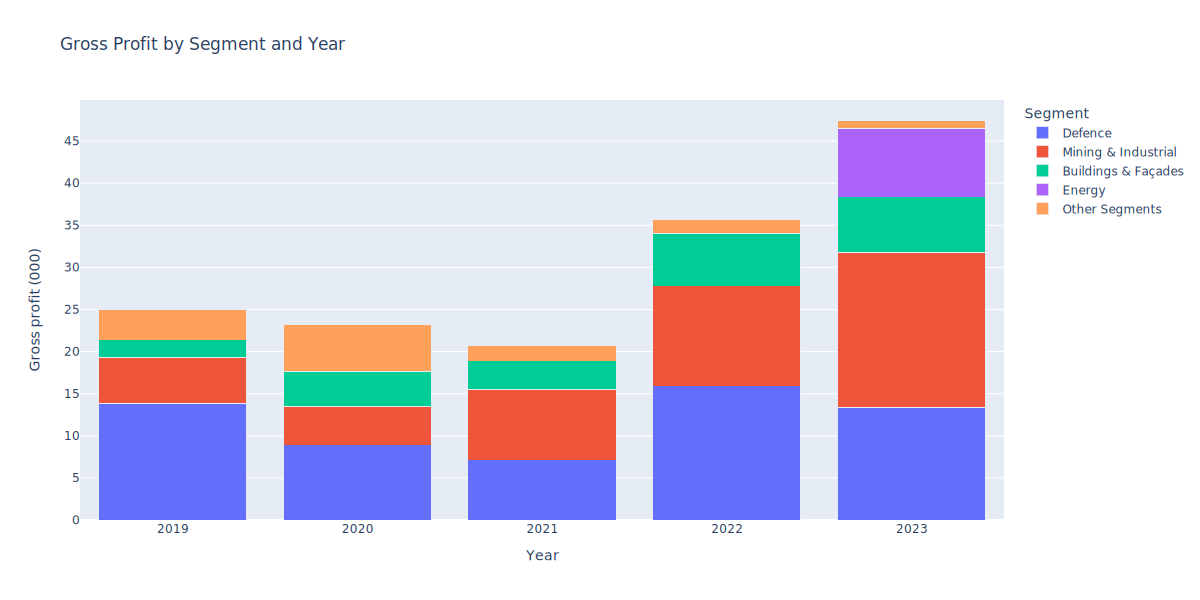

In [6]:
px.bar(df_gross_profit, x='Year/Segment', y='Amount', color='Segment', barmode='stack', title='Gross Profit by Segment and Year', labels={'Amount': 'Gross profit (000)', 'Year/Segment': 'Year'}, height=600, width=1200)

# 💡 We can see that there is a positive trend in each category
* The revenue and gross profit of the company has been increasing over the years
* 💡 `Other` segment is decreasing in terms of revenue and gross profit 
    * More selective approach to work. ie focus on main categories?

# Now we can take a look at CAGR for each segment

In [7]:
def cagr(start, end, periods):
    return ((end/start)**(1/periods) - 1)*100

In [8]:
df_revenue_by_year = df.loc[(slice(None), 'Revenue (000)'), :]
df_revenue_by_year

,,Defence,Mining & Industrial,Buildings & Façades,Energy,Other Segments,Total
Year/Segment,Item,,,,,,
2019.0,Revenue (000),71.904,22.242,11.259,0.00,22.802,128.207
2020.0,Revenue (000),54.106,27.588,15.301,0.00,27.068,124.063
2021.0,Revenue (000),54.976,32.289,26.957,0.00,16.661,130.883
2022.0,Revenue (000),112.069,55.183,38.093,0.00,23.187,228.532
2023.0,Revenue (000),124.151,84.044,52.871,23.25,8.421,292.737


In [9]:
df_gp_by_year = df.loc[(slice(None), 'Gross profit (000)'), :]
df_gp_by_year

,,Defence,Mining & Industrial,Buildings & Façades,Energy,Other Segments,Total
Year/Segment,Item,,,,,,
2019.0,Gross profit (000),13.846,5.453,2.059,0.000,3.618,24.976
2020.0,Gross profit (000),8.905,4.563,4.190,0.000,5.560,23.218
2021.0,Gross profit (000),7.118,8.408,3.369,0.000,1.838,20.733
2022.0,Gross profit (000),15.940,11.853,6.205,0.000,1.670,35.668
2023.0,Gross profit (000),13.377,18.389,6.581,8.126,0.909,47.382


# From 2019 to 2023

In [10]:
df_cagr = pd.DataFrame(index=['Revenue', 'Gross profit'], columns = df.columns)
start_year, end_year = df_revenue_by_year.index.levels[0].min(), df_revenue_by_year.index.levels[0].max()
for col in [x for x in df.columns if x != 'Energy']:
    df_cagr.loc['Revenue', col] = cagr(df_revenue_by_year.loc[(start_year, 'Revenue (000)'), col], df_revenue_by_year.loc[(end_year, 'Revenue (000)'), col], end_year - start_year)
    df_cagr.loc['Gross profit', col] = cagr(df_gp_by_year.loc[(start_year, 'Gross profit (000)'), col], df_gp_by_year.loc[(end_year, 'Gross profit (000)'), col], end_year - start_year)


df_cagr_23 = df_cagr.copy()
df_cagr_23

,Defence,Mining & Industrial,Buildings & Façades,Energy,Other Segments,Total
Revenue,14.630264,39.422614,47.207327,NaN,-22.044335,22.925355
Gross profit,-0.857789,35.512904,33.70846,NaN,-29.201537,17.360682


# From 2019 to 2022

In [11]:
df_cagr = pd.DataFrame(index=['Revenue', 'Gross profit'], columns = df.columns)
start_year, end_year = df_revenue_by_year.index.levels[0].min(), 2022
for col in [x for x in df.columns if x != 'Energy']:
    df_cagr.loc['Revenue', col] = cagr(df_revenue_by_year.loc[(start_year, 'Revenue (000)'), col], df_revenue_by_year.loc[(end_year, 'Revenue (000)'), col], end_year - start_year)
    df_cagr.loc['Gross profit', col] = cagr(df_gp_by_year.loc[(start_year, 'Gross profit (000)'), col], df_gp_by_year.loc[(end_year, 'Gross profit (000)'), col], end_year - start_year)
df_cagr 

,Defence,Mining & Industrial,Buildings & Façades,Energy,Other Segments,Total
Revenue,15.942897,35.376669,50.123421,NaN,0.559678,21.249073
Gross profit,4.806447,29.538122,44.44255,NaN,-22.717238,12.612161


# 💡 We can see that `Defence` is slowing, but other sectors are still keeping higher growth
* Energy is ommited as it is new in 2023

# 📌 Is it probable that guidance will be missed if these trends continue?
## 2024 Guidence:
* Revenue: 570 - 610m
* EBITDA: 45 - 52m

In [12]:
rev_l, rev_h = 570, 610
ebitda_l, ebitda_h = 45, 52

In [13]:
curr_revenue = df_revenue_by_year.loc[(2023, 'Revenue (000)'), 'Total']
curr_revenue

292.737

## Already fulfilled from guidance
* **~ 51 % from lower bound, 48 % from upper bound**

In [15]:
curr_revenue/rev_l, curr_revenue/rev_h

(0.5135736842105264, 0.4798967213114754)

In [16]:
rev_l - curr_revenue, rev_h - curr_revenue

(277.263, 317.263)

# ... 277 to 317m to go

## So let's say that CAGR will be ~ the same as till now
* ⚡ Energy CAGR is unknown but management says that they are positioned for growth&profit thus we will use conservative Defense sector CAGR as proxy

In [16]:
df_cagr_23.loc['Revenue', 'Energy'] = df_cagr_23.loc['Revenue', 'Defence']
df_cagr_23

,Defence,Mining & Industrial,Buildings & Façades,Energy,Other Segments,Total
Revenue,14.630264,39.422614,47.207327,14.630264,-22.044335,22.925355
Gross profit,-0.857789,35.512904,33.70846,NaN,-29.201537,17.360682


# If the trend continues the revenue by sector may look like this

In [17]:
(df_cagr_23.loc['Revenue']/100 + 1)[:-1]

Defence                1.146303
Mining & Industrial    1.394226
Buildings & Façades    1.472073
Energy                 1.146303
Other Segments         0.779557
Name: Revenue, dtype: object

In [18]:
df_revenue_by_year.loc[(2023, 'Revenue (000)'), :].iloc[:-1]

Defence                124.151
Mining & Industrial     84.044
Buildings & Façades     52.871
Energy                  23.250
Other Segments           8.421
Name: (2023.0, Revenue (000)), dtype: float64

# Revenue in H2 2024 by segment

In [19]:
(df_cagr_23.loc['Revenue']/100 + 1)[:-1] * df_revenue_by_year.loc[(2023, 'Revenue (000)'), :].iloc[:-1]

Defence                142.314619
Mining & Industrial    117.176341
Buildings & Façades     77.829986
Energy                  26.651536
Other Segments           6.564647
dtype: object

# Total Revenue in H2 2024
###  📌 ~ 370m which is more inclined to upper bound thus I expect them to not miss it

In [20]:
((df_cagr_23.loc['Revenue']/100 + 1)[:-1] * df_revenue_by_year.loc[(2023, 'Revenue (000)'), :].iloc[:-1]).sum()

370.5371291578709

# 📊 BONUS: Sensitivity analysis
* Le't say that CAGR will be in range N +- 1 ... X % - what revenue will be produced in the end?

In [21]:
arr_diff = np.arange(-0.09, 0.08, 0.02)
# Create all possible 5 elements combinations from arr_diff
combs = np.array(np.meshgrid(*[arr_diff]*5)).T.reshape(-1, 5)

res_revenue = np.zeros(combs.shape[0])

for i, comb in tqdm(enumerate(combs), total=combs.shape[0]):
    cagr_array = (df_cagr_23.loc['Revenue']/100 + 1)[:-1] + comb
    res_revenue[i] = (df_revenue_by_year.loc[(2023, 'Revenue (000)'), :].iloc[:-1] * cagr_array).sum()


  0%|          | 0/59049 [00:00<?, ?it/s]

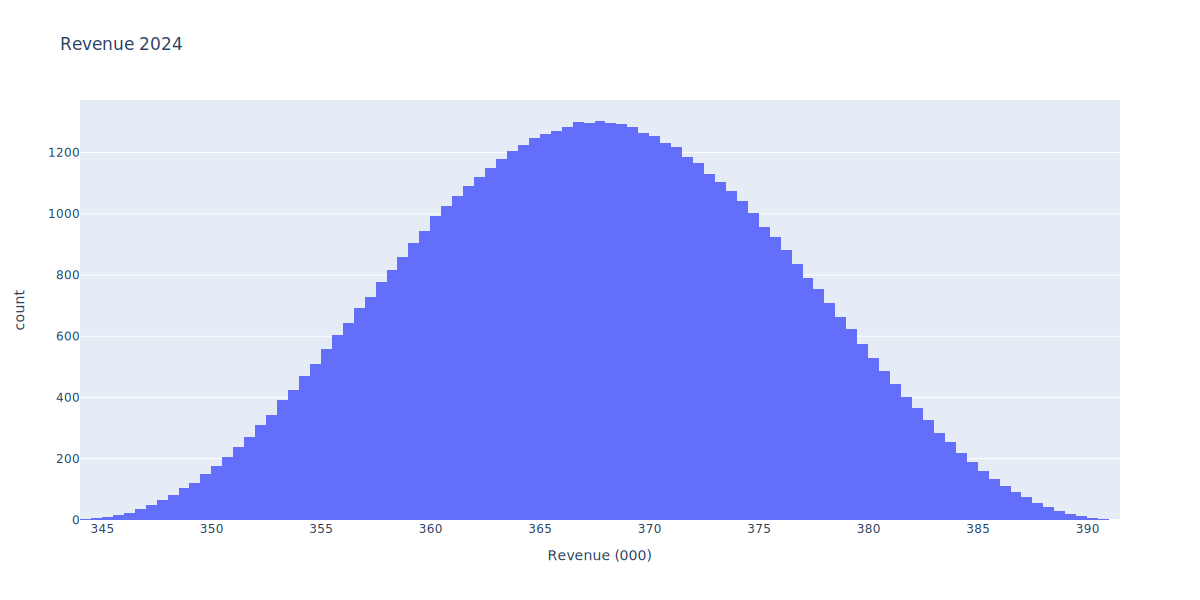

In [25]:
px.histogram(x=res_revenue, title='Revenue 2024', labels={'x': 'Revenue (000)'}, height=600, width=1200)

# 💡 If they want to miss revenue they would have to lower the CAGR of each segment by ~ 9 %

## 📌 H1 2024 EBITDA Margin is 8.2 %
* EBITDA H1 2024 was 23.9m
* We can again assume there may be some change so we will try to simulate +- X % changes in EBITDA margin

In [28]:
curr_ebitda = 23.9
curr_ebitda/ebitda_l, curr_ebitda/ebitda_h

(0.5311111111111111, 0.4596153846153846)

In [29]:
ebitda_l - curr_ebitda, ebitda_h - curr_ebitda

(21.1, 28.1)

# ... 21.1 to 28.1m to go

In [30]:
arr_diff_ebitda = np.arange(-0.04, 0.015, 0.005)
arr_ebitda = arr_diff_ebitda + 0.082
arr_ebitda

array([0.042, 0.047, 0.052, 0.057, 0.062, 0.067, 0.072, 0.077, 0.082,
       0.087, 0.092])

In [31]:
ebitda_possible = np.zeros((res_revenue.shape[0], arr_ebitda.shape[0]))

for i, rev in tqdm(enumerate(res_revenue), total=res_revenue.shape[0]):
    ebitda_possible[i] = rev * arr_ebitda

  0%|          | 0/59049 [00:00<?, ?it/s]

In [32]:
df_ebitda = pd.DataFrame(ebitda_possible, columns=[f'EBITDA Margin {np.round(x*100, 2)} %' for x in arr_ebitda], index=res_revenue)
df_ebitda

,EBITDA Margin 4.2 %,EBITDA Margin 4.7 %,EBITDA Margin 5.2 %,EBITDA Margin 5.7 %,EBITDA Margin 6.2 %,EBITDA Margin 6.7 %,EBITDA Margin 7.2 %,EBITDA Margin 7.7 %,EBITDA Margin 8.2 %,EBITDA Margin 8.7 %,EBITDA Margin 9.2 %
344.190799,14.456014,16.176968,17.897922,19.618876,21.339830,23.060784,24.781738,26.502692,28.223646,29.944600,31.665554
345.871679,14.526611,16.255969,17.985327,19.714686,21.444044,23.173403,24.902761,26.632119,28.361478,30.090836,31.820194
347.552559,14.597207,16.334970,18.072733,19.810496,21.548259,23.286021,25.023784,26.761547,28.499310,30.237073,31.974835
349.233439,14.667804,16.413972,18.160139,19.906306,21.652473,23.398640,25.144808,26.890975,28.637142,30.383309,32.129476
350.914319,14.738401,16.492973,18.247545,20.002116,21.756688,23.511259,25.265831,27.020403,28.774974,30.529546,32.284117
...,...,...,...,...,...,...,...,...,...,...,...
384.305199,16.140818,18.062344,19.983870,21.905396,23.826922,25.748448,27.669974,29.591500,31.513026,33.434552,35.356078
385.986079,16.211415,18.141346,20.071276,22.001207,23.931137,25.861067,27.790998,29.720928,31.650858,33.580789,35.510719
387.666959,16.282012,18.220347,20.158682,22.097017,24.035351,25.973686,27.912021,29.850356,31.788691,33.727025,35.665360
389.347839,16.352609,18.299348,20.246088,22.192827,24.139566,26.086305,28.033044,29.979784,31.926523,33.873262,35.820001


In [33]:
# Bin the df_ebitda by revenue - intervals of 5
bins = np.arange(340, 400, 5)
df_ebitda['Revenue bin'] = pd.cut(df_ebitda.index, bins)
df_ebitda = df_ebitda.groupby('Revenue bin').mean()
df_ebitda = df_ebitda.reset_index()
df_ebitda['Revenue bin'] = df_ebitda['Revenue bin'].astype(str)
df_ebitda.index = df_ebitda['Revenue bin']
df_ebitda = df_ebitda.drop(columns='Revenue bin')
df_ebitda

C:\Users\rasvo\AppData\Local\Temp\ipykernel_5788\3588499757.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,EBITDA Margin 4.2 %,EBITDA Margin 4.7 %,EBITDA Margin 5.2 %,EBITDA Margin 5.7 %,EBITDA Margin 6.2 %,EBITDA Margin 6.7 %,EBITDA Margin 7.2 %,EBITDA Margin 7.7 %,EBITDA Margin 8.2 %,EBITDA Margin 8.7 %,EBITDA Margin 9.2 %
Revenue bin,,,,,,,,,,,
"(340, 345]",14.474832,16.198026,17.921221,19.644415,21.367609,23.090803,24.813998,26.537192,28.260386,29.983581,31.706775
"(345, 350]",14.636074,16.378464,18.120854,19.863243,21.605633,23.348023,25.090413,26.832803,28.575192,30.317582,32.059972
"(350, 355]",14.824572,16.589402,18.354232,20.119062,21.883892,23.648722,25.413553,27.178383,28.943213,30.708043,32.472873
"(355, 360]",15.024960,16.813646,18.602331,20.391017,22.179703,23.968388,25.757074,27.545760,29.334445,31.123131,32.911817
"(360, 365]",15.229436,17.042464,18.855492,20.668520,22.481548,24.294576,26.107604,27.920632,29.733660,31.546688,33.359716
"(365, 370]",15.435112,17.272625,19.110138,20.947652,22.785165,24.622678,26.460192,28.297705,30.135218,31.972732,33.810245
"(370, 375]",15.640770,17.502767,19.364763,21.226760,23.088756,24.950752,26.812749,28.674745,30.536742,32.398738,34.260735
"(375, 380]",15.845316,17.731664,19.618011,21.504358,23.390705,25.277053,27.163400,29.049747,30.936094,32.822441,34.708789
"(380, 385]",16.045941,17.956172,19.866403,21.776634,23.686865,25.597096,27.507327,29.417558,31.327789,33.238020,35.148251


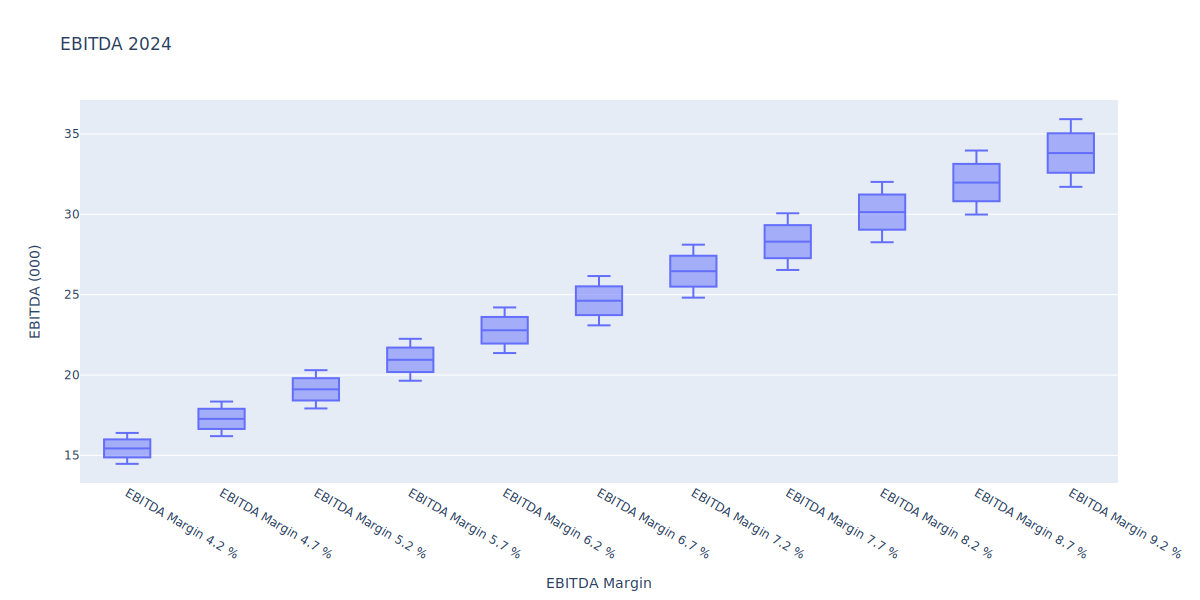

In [35]:
px.box(df_ebitda, title='EBITDA 2024', labels={'value': 'EBITDA (000)', 'variable': 'EBITDA Margin'}, height=600, width=1200)

## Order book and Tenders are important for further Revenue/EBITDA growth
* Order book is more volatile in nature
* The most important thing is that Tenders are growing as if the win rate is maintained/higher than now, the order book will follow

In [36]:
df_obt = pd.DataFrame(index=['H1 24', 'H1 23', 'H1 22', 'H1 21'], columns = ['Orderbook', 'Tendered', 'Opportunities'])
df_obt.loc['H1 24', :] = [0.387, 1.02, 3.7]
df_obt.loc['H1 23', :] = [0.529, 0.654, 2.04]
df_obt.loc['H1 22', :] = [0.450, 0.551, 1.6]
df_obt.loc['H1 21', :] = [0.113, 0.567, 1.93]
df_obt = df_obt.iloc[::-1]
df_obt

,Orderbook,Tendered,Opportunities
H1 21,0.113,0.567,1.93
H1 22,0.45,0.551,1.6
H1 23,0.529,0.654,2.04
H1 24,0.387,1.02,3.7


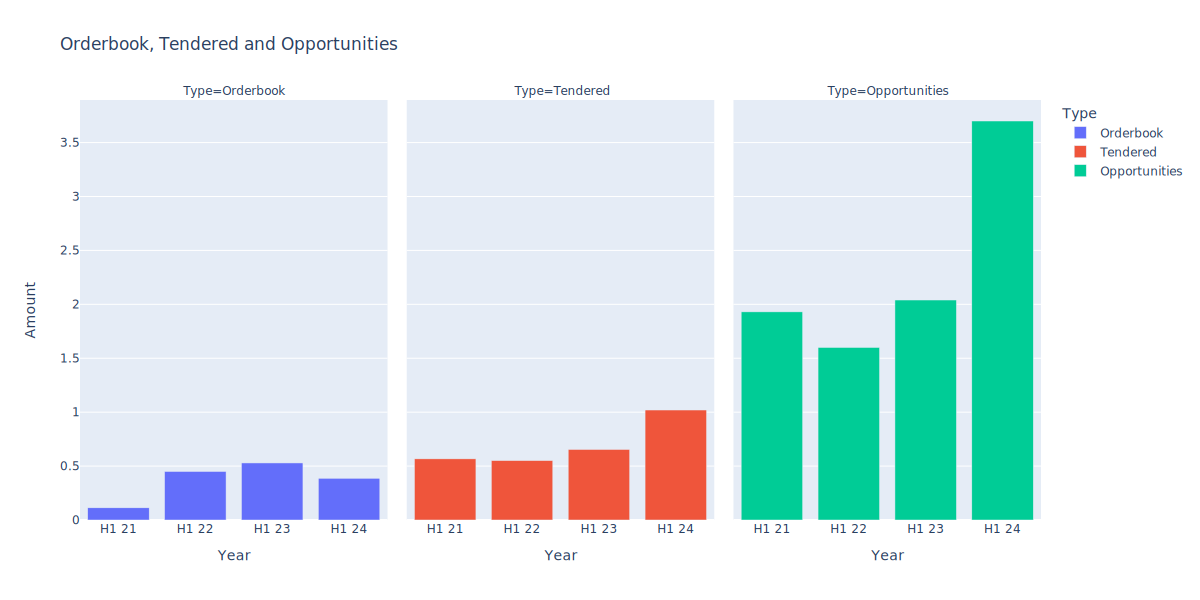

In [37]:
px.bar(df_obt.stack().reset_index(name='Amount').rename(columns={'level_0': 'Year', 'level_1': 'Type'}), facet_col='Type', y='Amount', x='Year', title='Orderbook, Tendered and Opportunities', color='Type',  height=600, width=1200)

# 💡 If they want to miss EBITDA they would have to either:
1) Have EBITDA margin lower than 5.7 %
2) Lower Revenue CAGR in each segment by 7-9 % and have EBITDA margin lower than 6.2 %

# 📌 TLDR: Given the high revenue growth and current EBITDA of 8.2 % it is improbable in current conditions to miss the estimates as they are pretty reasonable

![meme01](https://github.com/rasvob/Duratec-Segments-Report/blob/main/images/thats_all.jpg?raw=true)